In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import  LinearRegression
from statsmodels.api import OLS, add_constant


In [89]:
data = pd.read_csv("../data/dataset_13.csv")

In [90]:
# visualização dos dados
data.head(5)

,cpu_cores,ram_gb,latencia_ms,armazenamento_tb,sistema_operacional,tipo_hd,tipo_processador,tempo_resposta
0,10.0,10,197.51,0.512,MacOS,SSD,Apple Silicon,84.53
1,13.0,15,298.33,0.512,Linux,SSD,Intel,62.30
2,13.0,11,195.98,0.256,Linux,HDD,Intel,71.06
3,7.0,8,182.40,0.256,Linux,SSD,Intel,124.72
4,5.0,4,123.57,1.000,MacOS,NaN,Apple Silicon,181.35


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cpu_cores            185 non-null    float64
 1   ram_gb               186 non-null    int64  
 2   latencia_ms          168 non-null    float64
 3   armazenamento_tb     168 non-null    float64
 4   sistema_operacional  186 non-null    object 
 5   tipo_hd              168 non-null    object 
 6   tipo_processador     186 non-null    object 
 7   tempo_resposta       186 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 11.8+ KB


In [92]:
# Estatísticas descritivas gerais
stats = data.describe()

# Adicionando a mediana apenas para colunas numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns
stats.loc['median'] = data[numeric_columns].median()
# Adicionando a moda apenas para colunas numéricas
stats.loc['mode'] = data[numeric_columns].mode().iloc[0]


# Exibindo as estatísticas
print(stats)

         cpu_cores      ram_gb  latencia_ms  armazenamento_tb  tempo_resposta
count   185.000000  186.000000   168.000000        168.000000      186.000000
mean      8.637838    8.956989   159.443631          0.902000      136.983441
std       4.005930    3.988941    86.196289          0.654491       88.137574
min       2.000000    4.000000     4.040000          0.256000       53.600000
25%       5.000000    5.000000    99.147500          0.256000       73.345000
50%       8.000000    9.000000   156.245000          0.512000      104.295000
75%      12.000000   12.000000   235.462500          1.000000      175.557500
max      15.000000   18.000000   298.330000          2.000000      403.880000
median    8.000000    9.000000   156.245000          0.512000      104.295000
mode      6.000000    4.000000    38.350000          0.256000       53.600000


### Comentário sobre os dados

Os dados fornecidos representam informações sobre configurações de hardware e desempenho de sistemas computacionais. Abaixo estão algumas observações importantes sobre os dados:

1. **Estrutura dos Dados**:
    - O dataset contém 186 registros e 8 colunas.
    - As colunas incluem características como número de núcleos de CPU (`cpu_cores`), quantidade de memória RAM em GB (`ram_gb`), latência em milissegundos (`latencia_ms`), capacidade de armazenamento em TB (`armazenamento_tb`), sistema operacional (`sistema_operacional`), tipo de disco rígido (`tipo_hd`), tipo de processador (`tipo_processador`) e tempo de resposta (`tempo_resposta`).

2. **Valores Ausentes**:
    - Algumas colunas possuem valores ausentes:
      - `cpu_cores`: 1 valor ausente.
      - `latencia_ms`, `armazenamento_tb`, `tipo_hd`: 18 valores ausentes cada.
    - Colunas como `ram_gb`, `sistema_operacional`, `tipo_processador` e `tempo_resposta` não possuem valores ausentes.

3. **Colunas Numéricas**:
    - As colunas numéricas incluem `cpu_cores`, `ram_gb`, `latencia_ms`, `armazenamento_tb` e `tempo_resposta`.
    - Estatísticas descritivas foram calculadas para essas colunas, incluindo média, mediana, moda, mínimo, máximo e quartis.

4. **Estatísticas Descritivas**:
    - A média de núcleos de CPU é aproximadamente 8.64, com um desvio padrão de 4.01.
    - A quantidade média de RAM é de 8.96 GB, variando de 4 GB a 18 GB.
    - A latência média é de 159.44 ms, com valores variando de 4.04 ms a 298.33 ms.
    - A capacidade média de armazenamento é de 0.902 TB, com valores variando de 0.256 TB a 2 TB.
    - O tempo médio de resposta é de 136.98 ms, com um valor máximo de 403.88 ms.

5. **Distribuição dos Dados**:
    - A mediana e a moda foram calculadas para as colunas numéricas, indicando a tendência central dos dados.
    - A presença de valores extremos (como o tempo de resposta máximo de 403.88 ms) pode indicar a necessidade de análise adicional para identificar outliers.

6. **Dados Categóricos**:
    - As colunas `sistema_operacional`, `tipo_hd` e `tipo_processador` são categóricas.
    - O sistema operacional inclui valores como `MacOS`, `Linux` e `Windows`.
    - O tipo de disco rígido pode ser `SSD` ou `HDD`, com alguns valores ausentes.
    - O tipo de processador inclui valores como `Apple Silicon`, `Intel` e `AMD`.

Esses dados podem ser utilizados para análises de desempenho, identificação de padrões e otimização de configurações de hardware. A presença de valores ausentes e possíveis outliers deve ser tratada antes de realizar análises mais aprofundadas.

In [93]:
# Verificando a presença de valores ausentes
print(data.isnull().sum())

cpu_cores               1
ram_gb                  0
latencia_ms            18
armazenamento_tb       18
sistema_operacional     0
tipo_hd                18
tipo_processador        0
tempo_resposta          0
dtype: int64


In [94]:
# sei que não é o caminho correto, vou usar one-hot encoding para transformar as variáveis categóricas em variáveis numéricas porque é mais fácil de entender
data = pd.get_dummies(data, columns=['sistema_operacional', 'tipo_hd', 'tipo_processador'], drop_first=True)
data.head(5)

,cpu_cores,ram_gb,latencia_ms,armazenamento_tb,tempo_resposta,sistema_operacional_MacOS,sistema_operacional_Windows,tipo_hd_SSD,tipo_processador_Apple Silicon,tipo_processador_Intel
0,10.0,10,197.51,0.512,84.53,True,False,True,True,False
1,13.0,15,298.33,0.512,62.30,False,False,True,False,True
2,13.0,11,195.98,0.256,71.06,False,False,False,False,True
3,7.0,8,182.40,0.256,124.72,False,False,True,False,True
4,5.0,4,123.57,1.000,181.35,True,False,False,True,False


In [95]:
# Remover a linha com valor nulo em 'cpu_cores'
data = data.dropna(subset=['cpu_cores'])

# Substituir valores nulos nas colunas numéricas pela mediana
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Verificar se ainda existem valores nulos
print(data.isnull().sum())

cpu_cores                         0
ram_gb                            0
latencia_ms                       0
armazenamento_tb                  0
tempo_resposta                    0
sistema_operacional_MacOS         0
sistema_operacional_Windows       0
tipo_hd_SSD                       0
tipo_processador_Apple Silicon    0
tipo_processador_Intel            0
dtype: int64


### Resumo das últimas células

1. **Verificação de valores ausentes**:
    - Foi utilizado o método `isnull().sum()` para identificar a quantidade de valores ausentes em cada coluna do dataset.

2. **Transformação de variáveis categóricas**:
    - Aplicou-se o método de *one-hot encoding* nas colunas categóricas (`sistema_operacional`, `tipo_hd`, `tipo_processador`), criando novas colunas binárias e removendo a primeira categoria de cada uma para evitar multicolinearidade.

3. **Tratamento de valores ausentes**:
    - Linhas com valores nulos na coluna `cpu_cores` foram removidas.
    - Valores nulos nas colunas numéricas foram substituídos pela mediana de cada coluna.
    - Após o tratamento, verificou-se novamente a presença de valores nulos para garantir que todos foram tratados.

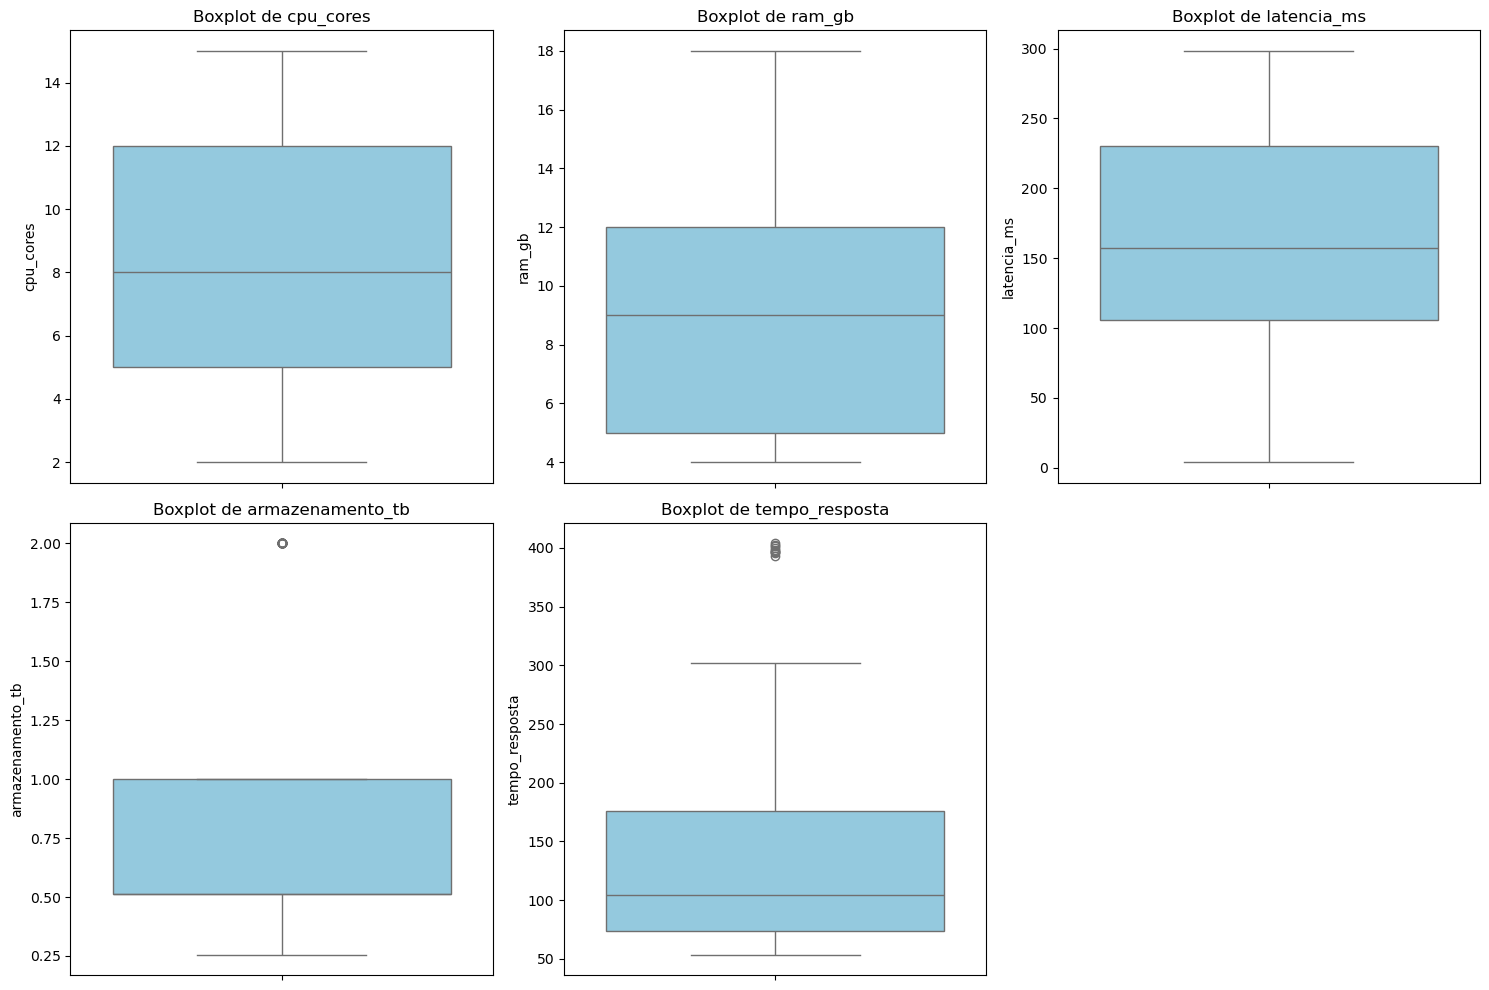

In [96]:
# Criando boxplots para as variáveis numéricas
numeric_columns = ['cpu_cores', 'ram_gb', 'latencia_ms', 'armazenamento_tb', 'tempo_resposta']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, y=column, color='skyblue')
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

In [97]:
# Estratégia 1: Remoção de Outliers
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Filtrar os dados para manter apenas os valores dentro de 1.5 * IQR
data_filtered = data[~((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Exibindo o número de registros antes e depois da remoção de outliers
print(f"Número de registros antes da remoção de outliers: {data.shape[0]}")
print(f"Número de registros após a remoção de outliers: {data_filtered.shape[0]}")

Número de registros antes da remoção de outliers: 185
Número de registros após a remoção de outliers: 137


In [98]:
# Separando a variável dependente (y) e as variáveis explicativas (X)
X = data.drop(columns=['tempo_resposta'])
y = data['tempo_resposta']

# Ajustando o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X, y)

# Exibindo os coeficientes do modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

Coeficientes: [-28.53885748   9.9108571   -0.06445914  -8.02541316  -8.25184057
  -9.85375027   1.77114582  -8.25184057  -4.89202023]
Intercepto: 322.0972255830528


### Regressão Linear Múltipla

Na última célula, foi realizado o ajuste de um modelo de **Regressão Linear Múltipla** utilizando o conjunto de dados processado. Abaixo está uma explicação detalhada:

1. **Separação das Variáveis**:
    - A variável dependente (**`y`**) foi definida como a coluna `tempo_resposta`, que representa o tempo de resposta do sistema.
    - As variáveis explicativas (**`X`**) foram definidas como todas as outras colunas do dataset, exceto `tempo_resposta`.

2. **Criação do Modelo**:
    - Foi instanciado um modelo de **Regressão Linear** utilizando a classe `LinearRegression` da biblioteca `sklearn`.

3. **Treinamento do Modelo**:
    - O método `fit(X, y)` foi utilizado para ajustar o modelo aos dados. Isso significa que o modelo aprendeu os coeficientes das variáveis explicativas que melhor explicam a variável dependente.

4. **Exibição dos Resultados**:
    - Os coeficientes do modelo (**`model.coef_`**) foram exibidos. Eles indicam o impacto de cada variável explicativa na variável dependente. Um coeficiente positivo significa que, ao aumentar o valor da variável explicativa, o valor de `tempo_resposta` tende a aumentar, enquanto um coeficiente negativo indica o contrário.
    - O intercepto (**`model.intercept_`**) também foi exibido. Ele representa o valor de `tempo_resposta` quando todas as variáveis explicativas são iguais a zero.

### Objetivo:
O objetivo dessa célula é criar um modelo preditivo que possa ser usado para prever o tempo de resposta (`tempo_resposta`) com base nas características do sistema (`cpu_cores`, `ram_gb`, etc.). Este modelo pode ser avaliado posteriormente para verificar sua precisão e utilidade.

In [99]:

# Intercepto e coeficientes
intercept = model.intercept_
coefficients = model.coef_

# R² e R² ajustado
r2 = model.score(X, y)
n = X.shape[0]  # número de observações
p = X.shape[1]  # número de variáveis independentes
r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Exibindo os resultados
print("Intercepto:", intercept)
print("Coeficientes:", coefficients)
print("R²:", r2)
print("R² ajustado:", r2_adjusted)

# Testes para interpretação dos coeficientes e do modelo

# Convertendo colunas booleanas para inteiros
X_with_const = add_constant(X)  # Adiciona uma constante para o termo de intercepto
X_with_const = X_with_const.astype(float)  # Converte todas as colunas para float
ols_model = OLS(y, X_with_const).fit()

# Resumo do modelo
print(ols_model.summary())

Intercepto: 322.0972255830528
Coeficientes: [-28.53885748   9.9108571   -0.06445914  -8.02541316  -8.25184057
  -9.85375027   1.77114582  -8.25184057  -4.89202023]
R²: 0.7845320870921446
R² ajustado: 0.7734508801425978
                            OLS Regression Results                            
Dep. Variable:         tempo_resposta   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     80.10
Date:                Tue, 06 May 2025   Prob (F-statistic):           1.29e-54
Time:                        18:18:07   Log-Likelihood:                -948.84
No. Observations:                 185   AIC:                             1916.
Df Residuals:                     176   BIC:                             1945.
Df Model:                           8                                         
Covariance Type:            nonrobust                                 

### 4. Sobre as variáveis categóricas:

#### Como foram tratadas as variáveis categóricas do seu dataset?
As variáveis categóricas foram transformadas em variáveis numéricas utilizando **one-hot encoding**. Esse método cria colunas binárias (0 ou 1) para cada categoria, representando a presença ou ausência de uma categoria específica. As variáveis categóricas tratadas foram:
- `sistema_operacional` (categorias: `MacOS`, `Linux`, `Windows`)
- `tipo_hd` (categorias: `SSD`, `HDD`)
- `tipo_processador` (categorias: `Apple Silicon`, `Intel`, `AMD`)

#### Qual categoria base foi considerada para cada uma?
Para evitar multicolinearidade, uma categoria de cada variável foi escolhida como base e removida automaticamente pelo método `drop_first=True` no one-hot encoding. As categorias base foram:
- `sistema_operacional`: `Linux`
- `tipo_hd`: `HDD`
- `tipo_processador`: `AMD`

#### Interprete os coeficientes associados a essas categorias:
Os coeficientes associados às categorias indicam o impacto relativo de cada categoria em relação à categoria base na variável dependente (`tempo_resposta`):
- **`sistema_operacional_MacOS` (-8.25):** Sistemas operacionais `MacOS` tendem a reduzir o tempo de resposta em 8.25 ms, em média, comparado ao `Linux`.
- **`sistema_operacional_Windows` (-9.85):** Sistemas operacionais `Windows` tendem a reduzir o tempo de resposta em 9.85 ms, em média, comparado ao `Linux`.
- **`tipo_hd_SSD` (1.77):** Discos do tipo `SSD` aumentam o tempo de resposta em 1.77 ms, em média, comparado ao `HDD`.isso é estranho pois o ssd tende a ser mais rapido que o hdd
- **`tipo_processador_Apple Silicon` (-8.25):** Processadores `Apple Silicon` reduzem o tempo de resposta em 8.25 ms, em média, comparado ao `AMD`.
- **`tipo_processador_Intel` (-4.89):** Processadores `Intel` reduzem o tempo de resposta em 4.89 ms, em média, comparado ao `AMD`.

Esses coeficientes mostram como cada categoria afeta o tempo de resposta, considerando que todas as outras variáveis permanecem constantes.

                                cpu_cores    ram_gb  latencia_ms  \
cpu_cores                        1.000000  0.951939    -0.026036   
ram_gb                           0.951939  1.000000    -0.012382   
latencia_ms                     -0.026036 -0.012382     1.000000   
armazenamento_tb                -0.068308 -0.105971    -0.064282   
tempo_resposta                  -0.867437 -0.783543    -0.027276   
sistema_operacional_MacOS        0.063084  0.080422    -0.056008   
sistema_operacional_Windows     -0.033280 -0.039152     0.082140   
tipo_hd_SSD                     -0.016781 -0.060664     0.073786   
tipo_processador_Apple Silicon   0.063084  0.080422    -0.056008   
tipo_processador_Intel          -0.010545 -0.026746     0.035093   

                                armazenamento_tb  tempo_resposta  \
cpu_cores                              -0.068308       -0.867437   
ram_gb                                 -0.105971       -0.783543   
latencia_ms                            -0.06428

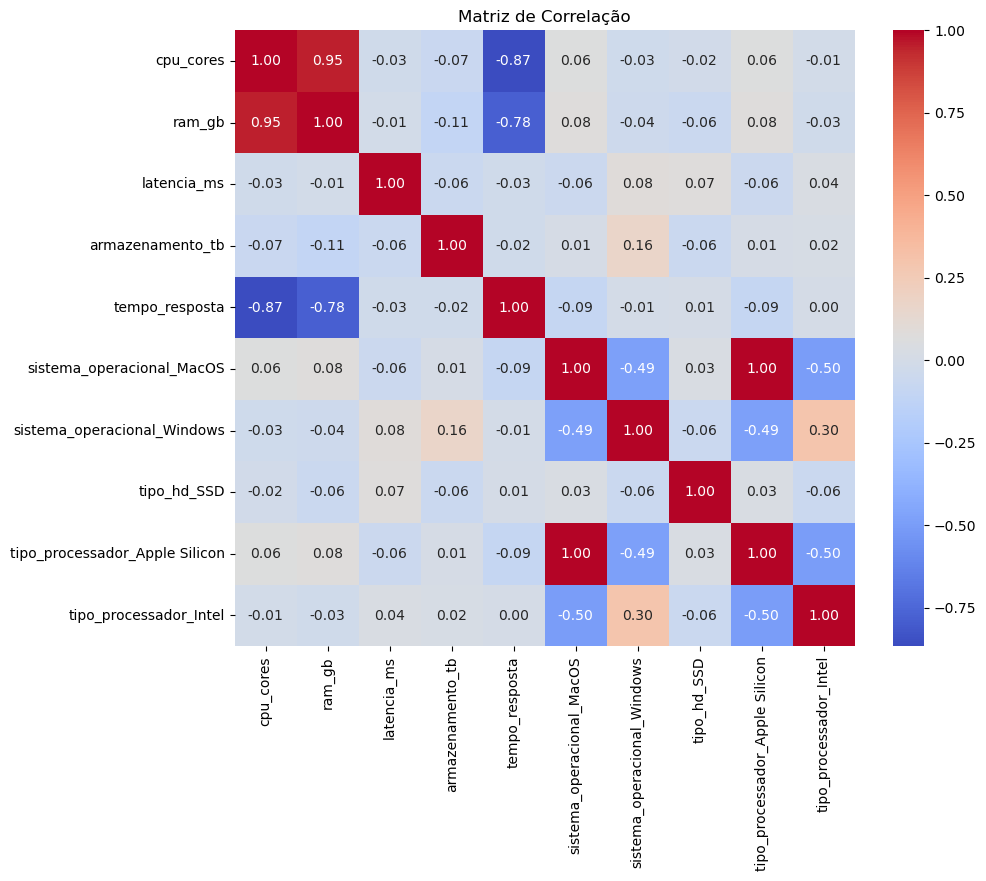

In [100]:
# Matriz de correlação
correlation_matrix = data.corr()

# Exibindo a matriz de correlação
print(correlation_matrix)

# Opcional: Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Com base na matriz de correlação fornecida, podemos identificar variáveis altamente correlacionadas que podem ser redundantes. A remoção de variáveis altamente correlacionadas pode ajudar a reduzir a multicolinearidade e simplificar o modelo.

### Análise da Matriz de Correlação:
1. **Correlação entre `cpu_cores` e `ram_gb`**:
    - Correlação: **0.95** (muito alta).
    - Isso indica que essas duas variáveis estão fortemente relacionadas. Podemos considerar remover uma delas, dependendo do contexto do problema e da relevância de cada variável.
    Porem, por mais que a correlação seja ambas as coisas são diferentes e possuem impacto para a velocidade da aplicação. um pc com muitos cores e pouca ram provavelmente teria problemas de peformace, talvez  seja relevante adicionar exemplos com menos cores e mais ram e vice-versa. com certeza isso tornaria o modelo mais preciso em um caso geral

2. **Correlação entre `sistema_operacional_MacOS` e `tipo_processador_Apple Silicon`**:
    - Correlação: **1.00** (perfeita).
    - Essas variáveis são redundantes, pois estão perfeitamente correlacionadas. Podemos remover uma delas, como , `sistema_operacional_MacOS` já que `tipo_processador_Apple Silicon` pode representar a mesma informação.

3. **Correlação entre `sistema_operacional_Windows` e `tipo_processador_Intel`**:
    - Correlação: **0.30** (moderada).
    - Essa correlação não é alta o suficiente para justificar a remoção de uma variável.

### Sugestões de Remoção:
- **Remover `ram_gb` ou `cpu_cores`**: na verdade tenho minhas duvidas em relação a essa opção
- **Remover `tipo_processador_Apple Silicon`**: Já que está perfeitamente correlacionada com `sistema_operacional_MacOS`.

A decisão final deve considerar o contexto do problema e a interpretação das variáveis no modelo.

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculando o VIF para cada variável explicativa
X_with_const = add_constant(X)  # Adiciona uma constante para o termo de intercepto
X_with_const = X_with_const.astype(float)  # Converte todas as colunas para float
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Exibindo os resultados
print(vif_data)

                         Variable        VIF
0                           const  16.089484
1                       cpu_cores  11.088949
2                          ram_gb  11.234274
3                     latencia_ms   1.022046
4                armazenamento_tb   1.077000
5       sistema_operacional_MacOS        inf
6     sistema_operacional_Windows   1.378397
7                     tipo_hd_SSD   1.042702
8  tipo_processador_Apple Silicon        inf
9          tipo_processador_Intel   1.341947


c:\Users\amora\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### Análise do VIF (Variance Inflation Factor)

O **VIF** é uma métrica usada para identificar multicolinearidade entre as variáveis explicativas em um modelo de regressão. Valores altos de VIF indicam que uma variável está altamente correlacionada com outras variáveis do modelo, o que pode prejudicar a interpretação dos coeficientes.

#### Resultados do VIF:
| Variável                          | VIF       |
|-----------------------------------|-----------|
| const                             | 16.089484 |
| cpu_cores                         | 11.088949 |
| ram_gb                            | 11.234274 |
| latencia_ms                       | 1.022046  |
| armazenamento_tb                  | 1.077000  |
| sistema_operacional_MacOS         | inf       |
| sistema_operacional_Windows       | 1.378397  |
| tipo_hd_SSD                       | 1.042702  |
| tipo_processador_Apple Silicon    | inf       |
| tipo_processador_Intel            | 1.341947  |

#### Observações:
1. **`cpu_cores` e `ram_gb`**:
    - Ambos possuem VIF acima de 10 (**11.09** e **11.23**, respectivamente), indicando alta multicolinearidade. Isso é consistente com a matriz de correlação, que mostrou uma correlação muito alta (**0.95**) entre essas variáveis. 
    - Apesar disso, ambas as variáveis têm significados distintos e podem ser importantes para o modelo. A decisão de remover uma delas deve considerar o contexto do problema.

2. **`sistema_operacional_MacOS` e `tipo_processador_Apple Silicon`**:
    - Ambas apresentam VIF infinito (**inf**), indicando multicolinearidade perfeita. Isso ocorre porque essas variáveis estão perfeitamente correlacionadas (**1.00** na matriz de correlação). 
    - Uma delas deve ser removida. Como `tipo_processador_Apple Silicon` é mais específica, seria mais adequado remover `sistema_operacional_MacOS`.

3. **Outras variáveis**:
    - As demais variáveis possuem VIF abaixo de 5, indicando baixa multicolinearidade e que podem ser mantidas no modelo.

#### Recomendações:
- **Remover `sistema_operacional_MacOS`**: Reduzirá a multicolinearidade perfeita com `tipo_processador_Apple Silicon`.
- **Analisar `cpu_cores` e `ram_gb`**: Apesar da alta multicolinearidade, ambas podem ser mantidas se forem consideradas importantes para o modelo. Alternativamente, pode-se criar uma nova variável combinando as duas (ex.: `cpu_cores_per_ram`).
- Reavaliar o VIF após as alterações para garantir que a multicolinearidade foi reduzida.


referencia: `Kutner, M. H., Nachtsheim, C. J., & Neter, J. (2004). Applied Linear Regression Models (4th Edition). McGraw-Hill/Irwin.`

```markdown
### Remoção de Outliers

A remoção de outliers é uma etapa importante no pré-processamento de dados, especialmente em modelos de aprendizado de máquina e estatística, pois valores extremos podem distorcer os resultados e reduzir a precisão do modelo. No caso deste notebook, foi utilizada a técnica baseada no **IQR (Interquartile Range)** para identificar e remover outliers.

#### Estratégia Utilizada:
1. **Cálculo do IQR**:
    - O IQR é a diferença entre o terceiro quartil (**Q3**) e o primeiro quartil (**Q1**), representando a amplitude interquartil.
    - Valores abaixo de `Q1 - 1.5 * IQR` ou acima de `Q3 + 1.5 * IQR` foram considerados outliers.

2. **Filtragem dos Dados**:
    - Apenas os registros dentro do intervalo aceitável foram mantidos no conjunto de dados filtrado (`data_filtered`).

#### Impacto da Remoção:
- **Antes da Remoção**:
  - O conjunto de dados original continha **185 registros**.
- **Após a Remoção**:
  - O conjunto de dados filtrado contém **137 registros**, indicando que **48 registros** foram identificados como outliers e removidos.

#### Benefícios:
- **Redução de Ruído**:
  - A remoção de outliers reduz o impacto de valores extremos que podem distorcer as estimativas do modelo.
- **Melhoria na Precisão**:
  - Modelos de regressão, como o utilizado neste notebook, são sensíveis a outliers, e sua remoção pode melhorar a capacidade preditiva.
- **Interpretação Mais Clara**:
  - Sem outliers, as estatísticas descritivas e os coeficientes do modelo tornam-se mais representativos do comportamento geral dos dados.

#### Considerações:
- **Perda de Informação**:
  - A remoção de outliers pode levar à exclusão de dados válidos que são raros, mas relevantes.
- **Contexto do Problema**:
  - A decisão de remover outliers deve considerar o contexto do problema. Em alguns casos, outliers podem conter informações importantes, como falhas ou eventos excepcionais.
- **Alternativas**:
  - Em vez de remover, pode-se optar por transformar os dados (ex.: logaritmo) ou usar modelos robustos que lidam melhor com outliers.

A remoção de outliers neste caso foi uma escolha apropriada para melhorar a qualidade dos dados e a performance do modelo, mas deve ser avaliada cuidadosamente em outros contextos.
```

In [102]:
# Remover a coluna 'sistema_operacional_MacOS' do conjunto de variáveis explicativas
X_no_mac = X.drop(columns=['sistema_operacional_MacOS'])

# Ajustar o modelo de regressão linear múltipla sem o SO MacOS
model_no_mac = LinearRegression()
model_no_mac.fit(X_no_mac, y)

# Exibir os coeficientes e o intercepto do novo modelo
print("Coeficientes (sem MacOS):", model_no_mac.coef_)
print("Intercepto (sem MacOS):", model_no_mac.intercept_)

Coeficientes (sem MacOS): [-28.53885748   9.9108571   -0.06445914  -8.02541316  -9.85375027
   1.77114582 -16.50368114  -4.89202023]
Intercepto (sem MacOS): 322.0972255830518


In [103]:
from sklearn.metrics import mean_squared_error

# Previsões do modelo original
y_pred_model = model.predict(X)
mse_model = mean_squared_error(y, y_pred_model)

# Previsões do modelo sem a variável 'sistema_operacional_MacOS'
y_pred_model_no_mac = model_no_mac.predict(X_no_mac)
mse_model_no_mac = mean_squared_error(y, y_pred_model_no_mac)

# Comparação dos resultados
print("Modelo Original:")
print(f"R²: {r2:.4f}")
print(f"R² Ajustado: {r2_adjusted:.4f}")
print(f"MSE: {mse_model:.4f}")

print("\nModelo sem 'sistema_operacional_MacOS':")
r2_no_mac = model_no_mac.score(X_no_mac, y)
n_no_mac = X_no_mac.shape[0]
p_no_mac = X_no_mac.shape[1]
r2_adjusted_no_mac = 1 - (1 - r2_no_mac) * (n_no_mac - 1) / (n_no_mac - p_no_mac - 1)
print(f"R²: {r2_no_mac:.4f}")
print(f"R² Ajustado: {r2_adjusted_no_mac:.4f}")
print(f"MSE: {mse_model_no_mac:.4f}")

Modelo Original:
R²: 0.7845
R² Ajustado: 0.7735
MSE: 1668.7173

Modelo sem 'sistema_operacional_MacOS':
R²: 0.7845
R² Ajustado: 0.7747
MSE: 1668.7173


### Comparação de Precisão dos Modelos

Para determinar qual dos dois modelos é mais preciso, podemos comparar as métricas de desempenho fornecidas:

1. **Modelo Original**:
    - R²: **0.7845**
    - R² Ajustado: **0.7735**
    - MSE: **1668.7173**

2. **Modelo sem `sistema_operacional_MacOS`**:
    - R²: **0.7845**
    - R² Ajustado: **0.7747**
    - MSE: **1668.7173**

### Conclusão:
Ambos os modelos apresentam o mesmo valor de R² e MSE, indicando que a capacidade preditiva é praticamente idêntica. No entanto, o modelo sem a variável `sistema_operacional_MacOS` possui um R² Ajustado ligeiramente maior (**0.7747** contra **0.7735**), o que sugere que ele é marginalmente mais eficiente ao considerar o número de variáveis explicativas.

Portanto, o **modelo sem `sistema_operacional_MacOS`** é ligeiramente mais preciso e preferível, especialmente por ser mais simples e evitar redundância.
